# 데이터 불러오기

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import collections

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.set_printoptions(edgeitems=2)
torch.manual_seed(123)

In [2]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [3]:
from torchvision import datasets, transforms
cifar10 = datasets.CIFAR10('data', 
    train=True, download=True,
    transform = transforms.Compose([
                                     transforms.ToTensor(),
                                     transforms.Normalize((0.4915, 0.4823, 0.4468),
                                                          (0.2470, 0.2435, 0.2616))
    ])
)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting data/cifar-10-python.tar.gz to data


In [4]:
cifar10_val = datasets.CIFAR10(
    'data', train=False, download=True,
    transform = transforms.Compose([
                                    transforms.ToTensor(),
                                    transforms.Normalize((0.4915, 0.4823, 0.4468),
                                                         (0.2470, 0.2435, 0.2616))
    ])
)

Files already downloaded and verified


In [19]:
for img, label in cifar10:
    print("img:{}, \nlabel:{}".format(img, label))
    break

img:tensor([[[-1.0531e+00, -1.3072e+00,  ...,  4.2339e-01,  3.5989e-01],
         [-1.7358e+00, -1.9899e+00,  ..., -1.0054e-01, -5.2909e-02],
         ...,
         [ 8.6794e-01,  7.5681e-01,  ..., -4.4983e-01, -6.7210e-01],
         [ 8.2031e-01,  6.7742e-01,  ...,  4.0752e-01, -3.7033e-02]],

        [[-9.8219e-01, -1.2399e+00,  ...,  3.2427e-02,  1.6322e-02],
         [-1.6586e+00, -1.9807e+00,  ..., -6.4398e-01, -5.7956e-01],
         ...,
         [ 2.5790e-01,  2.1737e-04,  ..., -9.8219e-01, -1.1271e+00],
         [ 3.3842e-01,  9.6848e-02,  ..., -8.0308e-02, -4.9904e-01]],

        [[-7.6354e-01, -1.0334e+00,  ..., -1.7890e-01, -1.6391e-01],
         [-1.4081e+00, -1.7080e+00,  ..., -9.5842e-01, -8.5348e-01],
         ...,
         [-2.6884e-01, -1.0783e+00,  ..., -1.1983e+00, -1.1983e+00],
         [ 3.0971e-02, -2.9882e-01,  ..., -4.4873e-01, -6.2862e-01]]]), 
label:6


In [5]:
label_map = {0:0, 2:1}
class_names = ['airplane', 'bird']
cifar2 = [(img, label_map[label])
            for img, label in cifar10
            if label in [0,2]]
cifar2_val = [(img, label_map[label])
                for img, label in cifar10_val
                if label in [0,2]]


In [14]:
len(cifar2_val)

2000

In [18]:
# img와 label이 들어있는 오브젝트
cifar2_val[0:5]

[(tensor([[[ 0.4710,  0.6615,  ...,  1.2172,  1.0585],
           [ 0.4393,  0.5980,  ...,  1.2331,  1.0108],
           ...,
           [-0.5768, -1.0373,  ..., -1.0214, -0.7991],
           [-0.5292, -1.0373,  ..., -0.9738, -0.8309]],
  
          [[ 0.5317,  0.8538,  ...,  1.2725,  0.9665],
           [ 0.5156,  0.9021,  ...,  1.4819,  1.0793],
           ...,
           [-0.6601, -1.0466,  ..., -0.9500, -0.8695],
           [-0.7245, -1.1432,  ..., -0.9339, -0.8856]],
  
          [[ 0.5257,  1.0953,  ...,  1.4701,  0.8555],
           [ 0.6456,  1.3502,  ...,  1.6949,  1.0353],
           ...,
           [-0.7785, -0.9134,  ..., -0.8985, -0.9434],
           [-0.7485, -0.9434,  ..., -0.9284, -0.9584]]]), 0),
 (tensor([[[-0.5610, -0.5610,  ..., -0.4022, -0.4022],
           [-0.5292, -0.5133,  ..., -0.3546, -0.3704],
           ...,
           [-0.4022, -0.3863,  ..., -0.5610, -0.5610],
           [-0.4181, -0.4022,  ..., -0.5610, -0.5768]],
  
          [[ 0.0163,  0.0163,  ...,  

# 모델 만들기

In [ ]:
connected_model = nn.Sequential(
            nn.Linear(3072, 1024),
            nn.Tanh(),
            nn.Linear(1024, 512),
            nn.Tanh(),
            nn.Linear(512, 128),
            nn.Tanh(),
            nn.Linear(128, 2)
)

In [ ]:
numel_list = [p.numel()
                for p in connected_model.parameters()
                if p.requires_grad == True]
sum(numel_list), numel_list

(3737474, [3145728, 1024, 524288, 512, 65536, 128, 256, 2])

In [ ]:
first_model = nn.Sequential(
                nn.Linear(3072, 512),
                nn.Tanh(),
                nn.Linear(512, 2),
                nn.LogSoftmax(dim=1)
)

In [ ]:
numel_list = [p.numel() for p in first_model.parameters()]
sum(numel_list), numel_list

(1574402, [1572864, 512, 1024, 2])

In [ ]:
linear = nn.Linear(3072, 1024)

linear.weight.shape, linear.bias.shape

(torch.Size([1024, 3072]), torch.Size([1024]))

In [ ]:
conv = nn.Conv2d(3, 16, kernel_size = 3)
conv

Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))

In [ ]:
conv.weight.shape, conv.bias.shape

(torch.Size([16, 3, 3, 3]), torch.Size([16]))

In [ ]:
img, _ = cifar2[0]
output = conv(img.unsqueeze(0))
img.unsqueeze(0).shape, output.shape

(torch.Size([1, 3, 32, 32]), torch.Size([1, 16, 30, 30]))

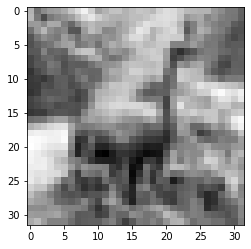

In [ ]:
plt.imshow(img.mean(0), cmap='gray')
plt.show()

# 경계 패딩하기
- 위의 사진에서 32 x 32가 conv 신경망에 들어갔다 나올 경우 30 x 30 사이즈 사진으로 변경됨
- 원본 크기를 유지하기 위해 경계에 0인 값을 추가함 -> 패딩

In [ ]:
conv = nn.Conv2d(3, 1, kernel_size = 3, padding = 1)
output = conv(img.unsqueeze(0))
img.unsqueeze(0).shape, output.shape

(torch.Size([1, 3, 32, 32]), torch.Size([1, 1, 32, 32]))

# 컨볼루션으로 피처 찾아내기


In [ ]:
# bias를 0으로 제거해 교란 변수 배제
with torch.no_grad():
    conv.bias.zero_()

In [ ]:
with torch.no_grad():
    conv.weight.fill_(1.0 / 9.0)

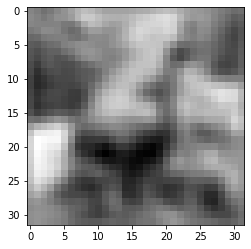

In [ ]:
output = conv(img.unsqueeze(0))
plt.imshow(output[0, 0].detach(), cmap='gray')
plt.show()

In [ ]:
conv = nn.Conv2d(3, 1, kernel_size = 3, padding = 1)

with torch.no_grad():
    conv.weight[:] = torch.tensor([[-1.0, 0.0, 1.0],
                                   [-1.0, 0.0, 1.0],
                                   [-1.0, 0.0, 1.0]])
    conv.bias.zero_()

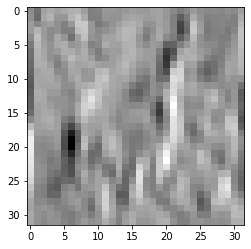

In [ ]:
output = conv(img.unsqueeze(0))
plt.imshow(output[0, 0].detach(), cmap='gray')
plt.show()

In [ ]:
pool = nn.MaxPool2d(2)
output = pool(img.unsqueeze(0))

img.unsqueeze(0).shape, output.shape

(torch.Size([1, 3, 32, 32]), torch.Size([1, 3, 16, 16]))

In [ ]:
model = nn.Sequential(
    nn.Conv2d(3, 16, kernel_size=3, padding=1),
    nn.Tanh(),
    nn.MaxPool2d(2),
    nn.Conv2d(16, 8, kernel_size=3, padding=1),
    nn.Tanh(),
    nn.MaxPool2d(2),
    ...
)

TypeError: ignored

In [ ]:
model = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=1),
            nn.Tanh(),
            nn.MaxPool2d(2),
            nn.Conv2d(16, 8, kernel_size=3, padding=1),
            nn.Tanh(),
            nn.MaxPool2d(2),
            # WARNING: something missing here
            nn.Linear(512, 32),
            nn.Tanh(),
            nn.Linear(32, 2))

In [ ]:
numel_list = [p.numel() for p in model.parameters()]
sum(numel_list), numel_list

(18090, [432, 16, 1152, 8, 16384, 32, 64, 2])

In [ ]:
# conv에서 선형층에 들어갈 fc 레이어가 없으므로 오류가 발생
model(img.unsqueeze(0))

RuntimeError: ignored

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.act1 = nn.Tanh()
        self.pool1 = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(16, 8, kernel_size=3, padding=1)
        self.act2 = nn.Tanh()
        self.pool2 = nn.MaxPool2d(2)
        self.fc1 = nn.Linear(8 * 8 * 8, 32)
        self.act4 = nn.Tanh()
        self.fc2 = nn.Linear(32, 2)

    def forward(self, x):
        out = self.pool1(self.act1(self.conv1(x)))
        out = self.pool2(self.act2(self.conv2(out)))
        out = out.view(-1, 8 * 8 * 8)
        out = self.act4(self.fc1(out))
        out = self.fc2(out)
        return out

In [ ]:
model = Net()

sum([p.numel() for p in model.parameters()])

18090

In [ ]:
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 8, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(8 * 8 * 8, 32)
        self.fc2 = nn.Linear(32, 2)

    def forward(self, x):
        out = F.max_pool2d(torch.tanh(self.conv1(x)), 2)
        out = F.max_pool2d(torch.tanh(self.conv2(out)), 2)
        out = out.view(-1, 8 * 8 * 8)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out



In [ ]:
model = Net()
model(img.unsqueeze(0))

tensor([[-0.0635,  0.2196]], grad_fn=<AddmmBackward0>)

# 훈련 루프 만들기
1. 모델에 입력값을 넣음(순방향 전달)
2. 손실값을 계산(마찬가지로 순방향 전달)
3. 이전 기울기 값을 0으로 리셋
4. loss.backward()를 호출하여 모든 파라미터에 대한 손실값의 기울기를 계산(역방향 전달)
5. 옵티마이저를 통해 손실값을 낮추어 파라미터를 조정하도록 함

In [21]:
import torch 
import torch.nn as nn
import torch.nn.functional as F

train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 8, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(8 * 8 * 8, 32)
        self.fc2 = nn.Linear(32, 2)

    def forward(self, x):
        out = F.max_pool2d(torch.relu(self.conv1(x)), 2)
        out = F.max_pool2d(torch.relu(self.conv2(out)), 2)
        out = out.view(-1, 8 * 8 * 8)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out



In [ ]:
model = Net()

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr = learning_rate)

loss_fn = nn.CrossEntropyLoss()

n_epochs = 30

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        outputs = model(imgs)
        loss = loss_fn(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 0.632560
Epoch: 1, Loss: 0.340343
Epoch: 2, Loss: 0.607264
Epoch: 3, Loss: 0.350118
Epoch: 4, Loss: 0.401271
Epoch: 5, Loss: 0.419576
Epoch: 6, Loss: 0.189908
Epoch: 7, Loss: 0.191224
Epoch: 8, Loss: 0.358683
Epoch: 9, Loss: 0.390712
Epoch: 10, Loss: 0.570221
Epoch: 11, Loss: 0.365532
Epoch: 12, Loss: 0.214836
Epoch: 13, Loss: 0.193797
Epoch: 14, Loss: 0.351945
Epoch: 15, Loss: 0.318043
Epoch: 16, Loss: 0.248408
Epoch: 17, Loss: 0.297726
Epoch: 18, Loss: 0.222869
Epoch: 19, Loss: 0.208220
Epoch: 20, Loss: 0.449226
Epoch: 21, Loss: 0.191030
Epoch: 22, Loss: 0.582725
Epoch: 23, Loss: 0.182429
Epoch: 24, Loss: 0.188850
Epoch: 25, Loss: 0.250681
Epoch: 26, Loss: 0.158985
Epoch: 27, Loss: 0.288103
Epoch: 28, Loss: 0.496874
Epoch: 29, Loss: 0.476341


# 훈련 루프를 만들어 학습시키기

In [25]:
import datetime

def training_loop(n_epochs, optimizer, model, loss_fn, train_loader):
    for epoch in range(1, n_epochs + 1): # 에포크 숫자는 0대신, 부터 n_epochs까지 루프를 돌며 부여
        loss_train = 0.0
        for imgs, labels in train_loader: # 데이터 로더가 만들어준 배치 안에서 데이터셋을 순회

            outputs = model(imgs) # 모델에 배치를 넣어줌

            loss = loss_fn(outputs, labels) # 최소화하려는 손실값 계산

            optimizer.zero_grad() # 마지막에 이전 기울기 값 지움
            
            loss.backward() # 역전파 수행. 즉 신경망이 학습할 모든 파라미터에 대한 기울기를 계산함

            optimizer.step() # 모델 업데이트

            loss_train += loss.item()

        if epoch == 1 or epoch % 10 ==0:
            print('{} Epoch {}, Training loss {}'.format(datetime.datetime.now(), epoch, loss_train / len(train_loader))) # 배치 단위의 평균 손실ㄱ밧을 구하기 위해 훈련 데이터 로더의 길이로 나눔

In [26]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)

In [27]:
model = Net()
optimizer = optim.SGD(model.parameters(), lr=1e-2)
loss_fn = nn.CrossEntropyLoss()

In [28]:
training_loop(
    n_epochs = 100,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    train_loader = train_loader,
)

2022-08-05 08:32:33.859502 Epoch 1, Training loss 0.6195598909050036
2022-08-05 08:33:03.679314 Epoch 10, Training loss 0.3429807173977992
2022-08-05 08:33:37.928973 Epoch 20, Training loss 0.29390389344115164
2022-08-05 08:34:10.904954 Epoch 30, Training loss 0.2628932417293263
2022-08-05 08:34:43.756067 Epoch 40, Training loss 0.2414248886097009
2022-08-05 08:35:16.523664 Epoch 50, Training loss 0.21627796835200802
2022-08-05 08:35:49.820651 Epoch 60, Training loss 0.19496696793539509
2022-08-05 08:36:22.494920 Epoch 70, Training loss 0.17147397971267153
2022-08-05 08:36:55.224862 Epoch 80, Training loss 0.14915141489380485
2022-08-05 08:37:28.723494 Epoch 90, Training loss 0.12616658398205308
2022-08-05 08:38:01.677388 Epoch 100, Training loss 0.10282189108336427


In [29]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=False)
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64, shuffle=False)

def validate(model, train_loader, val_loader):
    for name, loader in [("train", train_loader), ("val", val_loader)]:
        correct = 0
        total = 0

        with torch.no_grad(): # 파라미터를 업데이트 하지 않으므로 기울기는 x
            for imgs, labels in loader:
                outputs = model(imgs)
                _, predicted = torch.max(outputs, dim=1) # 가장 높은 값을 가진 인덱스를 출력
                total += labels.shape[0]
                correct += int((predicted == labels).sum())
        
        print("Accuracy {}: {:.2f}".format(name, correct / total))

validate(model, train_loader, val_loader)

Accuracy train: 0.96
Accuracy val: 0.89


In [30]:
# 모델 저장하고 불러오기
data_path = './'
torch.save(model.state_dict(), data_path + 'birds_vs_airplanes.pt')

In [31]:
loaded_model = Net()
loaded_model.load_state_dict(torch.load(data_path + 'birds_vs_airplanes.pt'))

<All keys matched successfully>

# GPU에서 훈련시키기

In [33]:
# GPU에서 훈련시키기
# .to 메소드를 사용하여 데이터 로더에서 얻은 텐서를 GPU로 옮길 수 있음
device = (torch.device('cuda') if torch.cuda.is_available()
        else torch.device("cpu"))

print(f"Training on device {device}.")

Training on device cuda.


In [40]:
import datetime

def training_loop(n_epochs, optimizer, model, loss_fn, train_loader):
    for epoch in range(1, n_epochs + 1):
        loss_train = 0.0

        for imgs, labels in train_loader:
            imgs = imgs.to(device=device)
            labels = labels.to(device=device)
            outputs = model(imgs)
            loss = loss_fn(outputs, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            loss_train += loss.item()

        if epoch == 1 or epoch % 10 == 0:
            print('{} Epoch {}, Training loss {}'.format(
                datetime.datetime.now(), epoch,
                loss_train / len(train_loader)))
            

In [41]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)

model = Net().to(device=device)
optimizer = optim.SGD(model.parameters(), lr = 1e-2)
loss_fn = nn.CrossEntropyLoss()

In [42]:
training_loop(
    n_epochs = 100,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    train_loader = train_loader,
    
)

2022-08-05 08:52:59.577340 Epoch 1, Training loss 0.6005666920333911
2022-08-05 08:53:02.843018 Epoch 10, Training loss 0.3333216232668822
2022-08-05 08:53:06.432194 Epoch 20, Training loss 0.29684593817990296
2022-08-05 08:53:09.983051 Epoch 30, Training loss 0.26948354749163245
2022-08-05 08:53:13.530364 Epoch 40, Training loss 0.2453673240865112
2022-08-05 08:53:17.086906 Epoch 50, Training loss 0.2202106645912122
2022-08-05 08:53:20.649771 Epoch 60, Training loss 0.19503652793206985
2022-08-05 08:53:24.240077 Epoch 70, Training loss 0.16829396724985662
2022-08-05 08:53:27.816998 Epoch 80, Training loss 0.14101288213756433
2022-08-05 08:53:31.428362 Epoch 90, Training loss 0.11314673849921318
2022-08-05 08:53:36.449549 Epoch 100, Training loss 0.0881593251944917


In [43]:
def validate(model, train_loader, val_loader):
    for name, loader in [("train", train_loader), ("val", val_loader)]:
        correct = 0
        total = 0

        with torch.no_grad(): # 파라미터를 업데이트 하지 않으므로 기울기는 x
            for imgs, labels in loader:
                imgs = imgs.to(device=device)
                labels = labels.to(device=device)
                outputs = model(imgs)
                _, predicted = torch.max(outputs, dim=1) # 가장 높은 값을 가진 인덱스를 출력
                total += labels.shape[0]
                correct += int((predicted == labels).sum())
        
        print("Accuracy {}: {:.2f}".format(name, correct / total))

validate(model, train_loader, val_loader)

Accuracy train: 0.95
Accuracy val: 0.89
